In [37]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
!pip install matplotlib==3.7.1

In [26]:
def dijkstra(graph, start, end):
  all_nodes = set(graph.keys())
  for neighbors in graph.values():
    all_nodes.update(neighbors.keys()) # Use update to add elements to the set.
  #all_nodes = set(graph.keys()).union(set([neighbors for neighbors in graph.values() for neighbor in neighbors.keys()]))
  distances = {node: float('inf') for node in all_nodes}
  distances[start] = 0
  queue = [(0, start)]
  previous_nodes = {}

  while queue:
    current_distance, current_node = heapq.heappop(queue)

    if current_distance > distances[current_node]:
      continue

    if current_node == end:
      break

    # Check if current_node has neighbors before iterating
    if current_node in graph:
      for neighbor, weight in graph[current_node].items():
        distance = current_distance + weight

        if distance < distances[neighbor]:
          distances[neighbor] = distance
          previous_nodes[neighbor] = current_node
          heapq.heappush(queue, (distance, neighbor))

  # Check if a path was found before trying to reconstruct it
  if end in previous_nodes:
    path = []
    node = end
    while node != start:
      path.append(node)
      node = previous_nodes[node]
    path.append(start)
    path.reverse()

    return distances[end], path
  else:
    # Return infinity and an empty path if no path is found
    return float('inf'), []

In [51]:
# Algoritmo em uso

if __name__ == "__main__":
  graph = defaultdict(dict)
  # Linha Centro-1:
  graph['Camaragibe']['Cosme e Damião'] = 4
  graph['Cosme e Damião']['Rodoviária'] =3
  graph['Rodoviária']['Curado'] = 5
  graph['Curado']['Alto do Céu'] = 3
  graph['Alto do Céu']['Tejipió'] = 6
  graph['Tejipió']['Barro'] = 4
  graph['Barro']['Recife'] = 10

  # Linha Centro-2:
  graph['Camaragibe']['Cosme e Damião'] = 4
  graph['Cosme e Damião']['Rodoviária'] = 3
  graph['Rodoviária']['Curado'] = 5
  graph['Curado']['Alto do Céu'] = 3
  graph['Alto do Céu']['Tejipió'] = 6
  graph['Tejipió']['Coqueiral'] = 2
  graph['Coqueiral']['Barro'] = 3
  graph['Barro']['Werneck'] = 2
  graph['Werneck']['Santa Luzia'] = 3
  graph['Santa Luzia']['Mangueira'] = 4
  graph['Mangueira']['Ipiranga'] = 2
  graph['Ipiranga']['Afogados'] = 5

  # Linha Sul:
  graph['Recife']['Joana Bezerra'] = 2
  graph['Joana Bezerra']['Afogados'] = 4
  graph['Afogados']['Imbiribeira'] = 5
  graph['Imbiribeira']['Largo da Paz'] = 3
  graph['Largo da Paz']['Aeroporto'] = 6
  graph['Aeroporto']['Prazeres'] = 5
  graph['Prazeres']['Cajueiro Seco'] = 7
  start_node = 'Camaragibe'
  end_node = 'Cajueiro Seco'

  shortest_distance, shortest_path = dijkstra(graph, start_node, end_node)
  if shortest_distance == float('inf'):
    print(f'Não foi encontrado caminho entre {start_node} e {end_node}.')
  else:
    print(f'Distância mais curta entre {start_node} e {end_node} levará {shortest_distance} minutos.')
    print(f'Melhor rota: {shortest_path}.')

Distância mais curta entre Camaragibe e Cajueiro Seco levará 67 minutos.
Melhor rota: ['Camaragibe', 'Cosme e Damião', 'Rodoviária', 'Curado', 'Alto do Céu', 'Tejipió', 'Barro', 'Werneck', 'Santa Luzia', 'Mangueira', 'Ipiranga', 'Afogados', 'Imbiribeira', 'Largo da Paz', 'Aeroporto', 'Prazeres', 'Cajueiro Seco'].


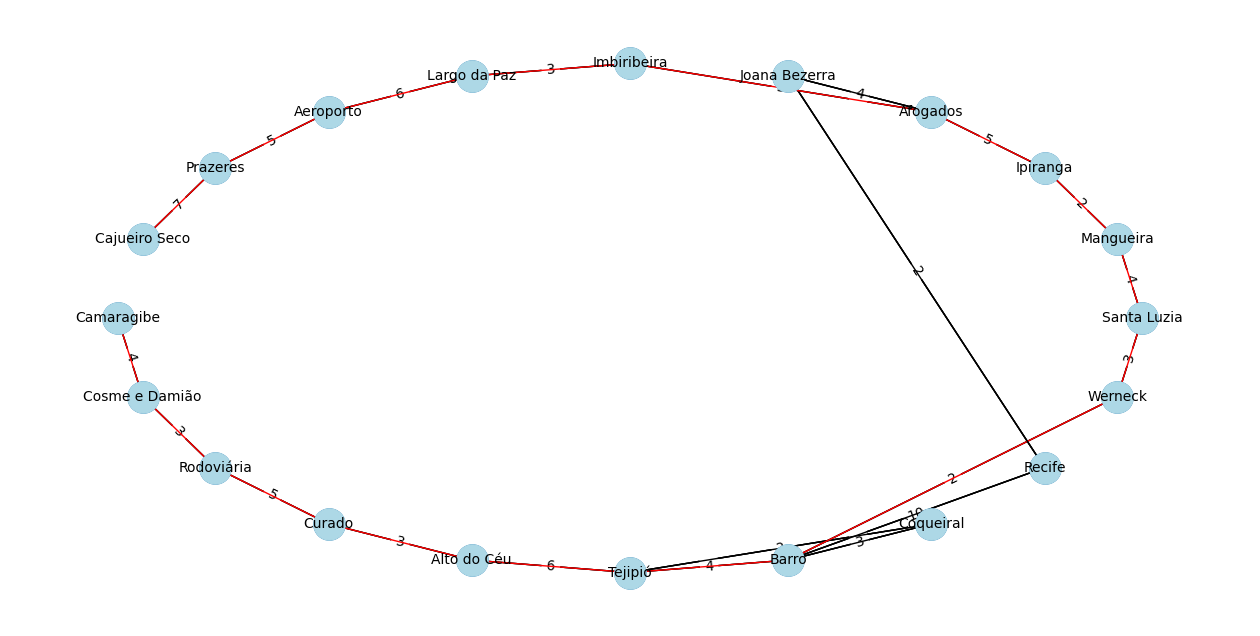

In [52]:
# Plot do grafo
G = nx.Graph()
for node in graph:
  G.add_node(node)
  for neighbor, weight in graph[node].items():
    G.add_edge(node, neighbor, weight=weight)

pos = nx.shell_layout(G)
plt.figure(figsize=(16,8)) # Define o tamanho da figura
nx.draw_networkx(G, pos, with_labels=False, node_size=500)

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx(G, pos, with_labels=False, node_size=500, node_color='lightblue', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Desenhar rótulos dos nós em posições específicas
node_labels = {node: node for node in G.nodes()}
node_label_positions = {node: (pos[node][0], pos[node][1]) for node in G.nodes()}
nx.draw_networkx_labels(G, node_label_positions, labels=node_labels, font_size=10)

# Destacar a melhor rota no gráfico
edge_labels = {(u,v): d['weight'] for u, v, d in G.edges(data=True)}
highlighted_edges = [(shortest_path[i], shortest_path[i+1]) for i in range (len(shortest_path) - 1)]
edge_colors = ['red' if edge in highlighted_edges else 'black' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=edge_colors)

# Mostrar o gráfico
plt.axis('off')
plt.show()

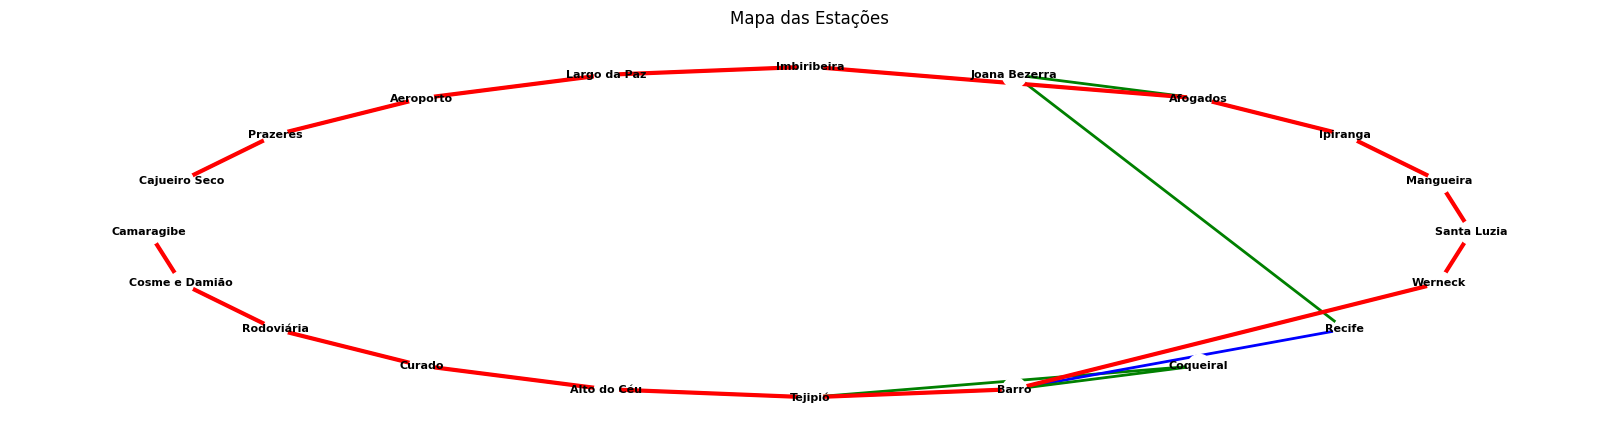

In [53]:
# Estilo de mapa de metrô
plt.figure(figsize=(16, 4))  # Ajuste o tamanho da figura para uma visualização horizontal
nx.draw(G, pos, with_labels=True, node_size=300, node_color='w', font_size=8, font_weight='bold', edge_color='gray')

# Adicionar cores às linhas
edge_colors = ['blue' if edge in [('Camaragibe', 'Cosme e Damião'), ('Cosme e Damião', 'Rodoviária'), ('Rodoviária', 'Curado'), ('Curado', 'Alto do Céu'), ('Alto do Céu', 'Tejipió'), ('Tejipió', 'Barro'), ('Barro', 'Recife')] else 'green' for edge in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)

# Destacar a melhor rota
highlighted_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]
nx.draw_networkx_edges(G, pos, edgelist=highlighted_edges, edge_color='red', width=3)

plt.title("Mapa das Estações")
plt.axis('off')
plt.show()